# STAT 207 Project 03 - Creating Models for Mobile Device Usage

Mann Sheth & Aayan Verma


### Contribution Report

If you open this document, you should edit and complete the contribution report. Please complete this report if you work individually, in a group and your submission is the one to be graded, or in a group but someone else should be graded.

In this contribution report below you should list of the following:

1. The netID for the project submission to be graded. (Some groups have each member create their own version of the document, but only one needs to be submitted for grading. Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions to report of each team member.

_For example:_

_<u>Teammates:</u>_

_doe105 should be graded. John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project_,

OR

_doe105 should be graded_

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>


<b>aayanv2</b> should be graded. Aayan Verma (aayanv2) and Mann Sheth (mannbs2) worked together on all parts of the project.

## 1. Introduction


In [2]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error


<h3>Background Information</h3>

This dataset was obtained from Kaggle on 10/17/24 under this link: https://www.kaggle.com/datasets/valakhorasani/mobile-device-usage-and-user-behavior-dataset?resource=download. Essentially, the dataset has a random sample of mobile users and their screen times on their phone, alongside other recorded variables. This dataset was created after research on mobile device usage from Pew Research and Statista became public. The dataset keeps privacy intact by listing each user as an ID (number) and displays their stats accordingly. The dataset also notes the model of the phone to help give a little bit more insight about each device.


In [3]:
df = pd.read_csv("user_behavior_dataset.csv")
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [4]:
rows = len(df)
columns = len(df.columns)
print("There are", rows, "mobile device users in this dataset with", columns, "variables recorded about each users phone")

There are 700 mobile device users in this dataset with 11 variables recorded about each users phone


In [5]:
df.nsmallest(1, "Age")

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
43,44,Samsung Galaxy S21,Android,152,3.7,993,32,429,18,Male,2


In the description of the dataset, it was reported that all the data contained is part of a sample of a larger population. To figure out the population of interest, it would be easy to say all mobile device users. However, the ethics of research dictate that one must be 18 or older to have their data recorded. <b>This means that our population of interest would be all ADULT mobile device users. In other words, our population of interest is all mobile device users 18 or older.</b> The dataset we are working with is a sample of 700 of those mobile device users.


<h3> Research Questions </h3>

1. What is the relationship between the Battery Drain and Screen On Time after controlling for App Usage Time, Number of Apps, and Data Usage? How does this relationship perform alongside new data?

2. How does the Age, Gender, and Device Model of an adult's mobile device affect the log-odds of the Operating System that they use? What is the probability threshold that would give us the most accurate classifier for this model?

<b>Response Variables:</b> Battery Drain (mAh/day) for Linear Regression, Operating System for Logistic Regression


<h3>Motivation</h3>

As technology improves over the course of the decade, we are interested to see how the battery improved in the newer mobile devices. It's common knowledge that phone usage is what decreases battery life, so we decided to use all the variables that correspond to phone usage to see how it affects battery life. In addition to that, there has always been a war between iOS and Android devices, and we would like to see who is winning amongst adult, mobile device users.


## 2. Linear Regression Analytical Tasks


<h3> Research Question: </h3>

What is the relationship between the Battery Drain and Screen On Time after controlling for App Usage Time, Number of Apps, and Data Usage? How does this relationship perform alongside new data?


<h3> Splitting the Data: </h3>

Firstly, we want well our linear regression model performs against new data given to it. To do this, we first need to split our original dataframe into a training dataset and a testing dataset. The training dataset will be used to create our model, while the testing dataset will be used to show how well our model performs against new data.


In [84]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 207)

In [85]:
df_train.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
86,87,Samsung Galaxy S21,Android,151,2.4,1003,25,392,39,Male,2
23,24,Google Pixel 5,Android,292,5.6,1401,46,949,37,Female,3
130,131,Google Pixel 5,Android,540,10.8,2923,90,1886,40,Male,5
132,133,Google Pixel 5,Android,176,3.6,1193,30,458,40,Female,2
445,446,Samsung Galaxy S21,Android,378,7.2,1859,61,1318,58,Male,4


Now let's fit a linear regression model for our training data to predict the Battery Drain from the App Usage, Apps Installed, Screen On Time, and Data Usage.


In [86]:
# Because of the spaces in the original dataframe, we will encounter a compilation error when we create our model
# To work around this, we have to create new columns that are just equal to their originals
df_train["battery_drain"] = df_train["Battery Drain (mAh/day)"]
df_train["no_apps"] = df_train["Number of Apps Installed"]
df_train["screen_time"] = df_train["Screen On Time (hours/day)"]
df_train["data_usage"] = df_train["Data Usage (MB/day)"]
df_train["app_time"] = df_train["App Usage Time (min/day)"]

In [87]:
# We should do the same thing with the test data later so we can evaluate our model's performance on new data effectively
df_test["battery_drain"] = df_test["Battery Drain (mAh/day)"]
df_test["no_apps"] = df_test["Number of Apps Installed"]
df_test["screen_time"] = df_test["Screen On Time (hours/day)"]
df_test["data_usage"] = df_test["Data Usage (MB/day)"]
df_test["app_time"] = df_test["App Usage Time (min/day)"]

In [88]:
linear_model = smf.ols("battery_drain ~ screen_time + no_apps + data_usage + app_time", data = df_train).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          battery_drain   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2333.
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:21:25   Log-Likelihood:                -3745.5
No. Observations:                 560   AIC:                             7501.
Df Residuals:                     555   BIC:                             7523.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     140.1495     20.035      6.995      0.000     100.796     179.503
screen_time    49.1760     10.233      4.805      0.000      29.075      69.277
no_apps        12.7080      1.166     10.903      0.000      10.419      14.997
data_usage      0.0921      0.044      2.099      0.036       0.006       0.178
app_time        1.4402      0.191      7.550      0.000       1.065       1.815
==============================================================================
Omnibus:                       27.343   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.130
Skew:                           0.102   Prob(JB):                      0.00232
Kurtosis:                       2.308   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary of our model above, we are able to create the following regression formula:

<b>ŷ = 136.5578 + 61.5865 _ (screen_time) + 12.6861 _ (no_apps) + 0.0915 _ (data_usage) + 1.2483 _ (app_time)</b>


From this equation, we have further insight into what we are aiming for, the relationship between the screen on time and the battery drain. The equation tells us that assuming we hold the number of apps, the data usage, and the app screen time constant, we estimate each additional hour of screen on time for an adult's mobile device will drain the battery by <b>61.5865</b> mAh, on average.


Another thing to point out about this model is that it was trained under data provided by a sample of 700 adult, mobile device users. To find out the relationship between the screen on time and the batter drain in the underlying population of adult, mobile device users, we can create a 95% confidence interval. Fortunately, our model's summary provides us with that interval, showing us that we are 95% confident that the true slope for the screen on time and battery drain in the population lies between <b>41.860</b> and <b>81.313</b>.

Now, we want to assess how viable this model is. To do this, we can create two different visualizations that provide insight about the model:

1) A pairplot of all the quantitative variables to assess for <b>multicollinearity</b>. 

2) A <b>fitted vs. residuals</b> plot to assess equal variance and a linear relationship.

If multicollinearity is present, it means that there is a high correlation coefficient between our predictor variables, which doesn't guarantee that an individual variable directly affects the battery drain. Equal variance and a linear relationship from the second plot also shows us how strong the model is as a linear regression model and if the relationship is truly linear.

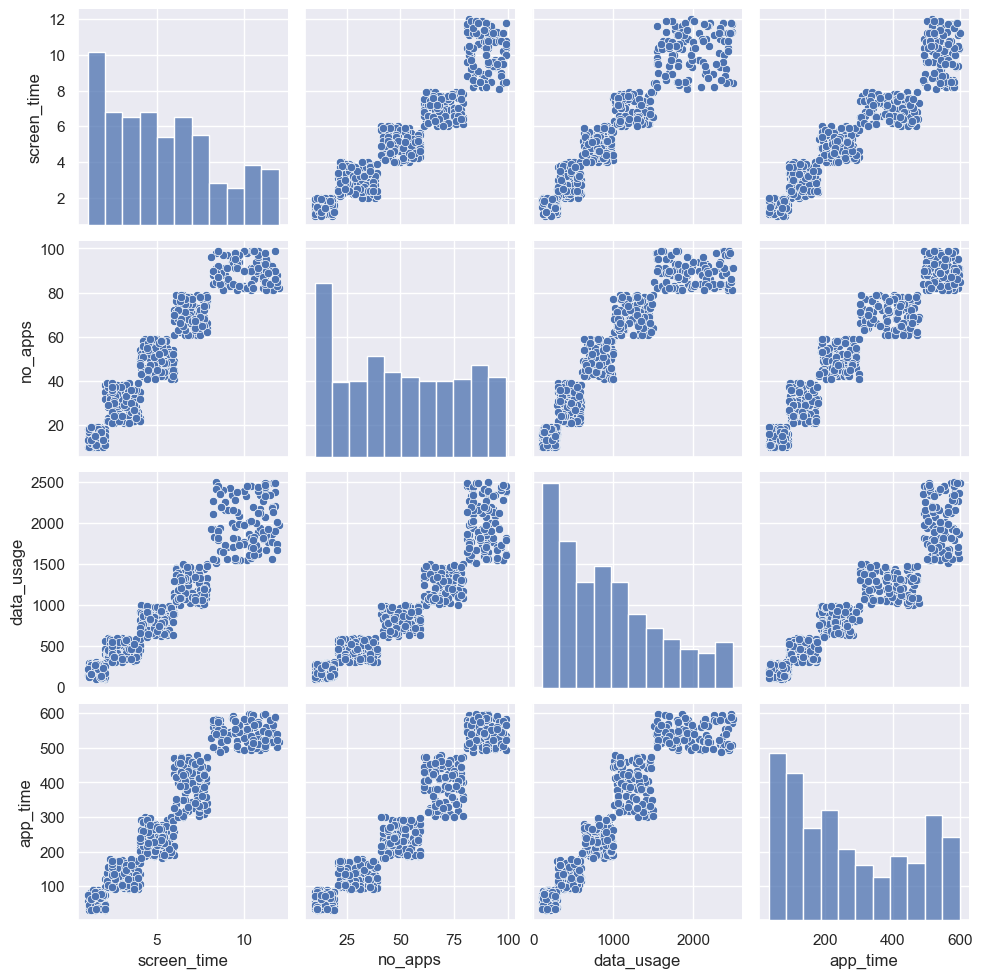

In [89]:
linear_predictors = df_train[["screen_time", "no_apps", "data_usage", "app_time"]]
sns.pairplot(linear_predictors)

In [90]:
linear_predictors.corr()

,screen_time,no_apps,data_usage,app_time
screen_time,1.000000,0.946000,0.944678,0.951671
no_apps,0.946000,1.000000,0.934845,0.956611
data_usage,0.944678,0.934845,1.000000,0.942461
app_time,0.951671,0.956611,0.942461,1.000000


From our pariplot, we can see that there is a substantial amount of multicollinearity present. This means that we cannot be certain about an individual variable's effect on the battery drain, as there is correlation present between all the predictor variables.

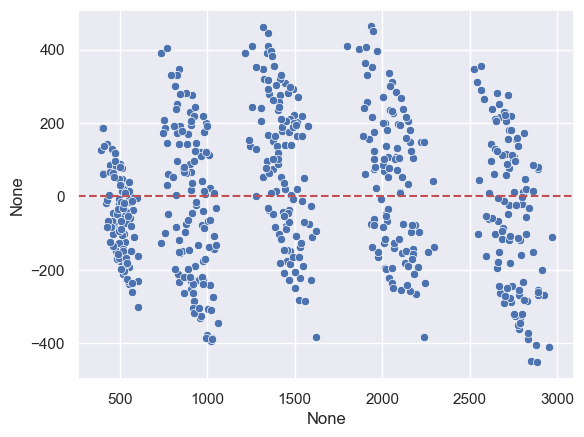

In [91]:
fitted = linear_model.fittedvalues
residuals = linear_model.resid
sns.scatterplot(x = fitted, y = residuals)
plt.axhline(y = 0, color = 'r', linestyle = "--")

From our fitted vs. residual plot above, we can see that there exists 5 similar clusters across the graph. Each cluster seems to have similar spread amongst the residuals, which supports equal variance. Additionally, there is no clear pattern between the residuals, which suggests that the model is good to be classified as a linear regression model.

However, because of the large amount of multicollinearity present, our model cannot be trusted and should be adjusted for further review if we continued to use it for further information.

Our last bit of work for this linear model to predict battery drain is to evaluate model performance. We already were able to check if certain model conditions were met previously, but we never evaluated the strength of the model. To do this, we can use the $R^2$ value of the model and calculate the RMSE for the training data and testing data.

In [92]:
linear_model.rsquared

0.943869465105808

From our $R^2$ value, we can say that approximately <b>94.54%</b> of variability in the battery drain can be explained by the model, which is extremely high and correlates with good model performance.

In [93]:
rmse_train = root_mean_squared_error(df_train["battery_drain"], fitted)
rmse_train

194.30505927366252

In [94]:
fitted_test = linear_model.predict(df_test)
rmse_test = root_mean_squared_error(df_test["battery_drain"], fitted_test)
rmse_test

175.51480218066177

The RMSE calculates the typical (average) deviation between our predicted value for the battery drain and the actual value. From our calculations, we can see that the RMSE for the test data is <b>191.38</b>, which, in context of the situation, is actually pretty low. This also tells us that the model is strong as a linear regression model.

To conclude with our linear regression model to calculate the battery drain of an adult's mobile device based on the screen on time, number of apps, app time, and data usage, we discovered that we have a very strong model that unfortunately has a substantial amount of multicollinearity present. This means that although we can say our model can predict battery drain well, we are unsure of how each individual variable affects it.

## 3. Logistic Regression Analytical Tasks


<h3> Research Question </h3>

How does the Age, Gender, and Device Model of an adult's mobile device affect the log-odds of the Operating System that they use? What is the probability threshold that would give us the most accurate classifier for this model?


<h3> Splitting the Data: </h3>

Since the data has already been split in section 2, we will not need to split it again. We will also be using the new naming conventions used in section 2 to make it easier to use. We will also need to change the name of the "User Behavior Class" column to not have any spaces. However, we will need to convert the "screen_time" variable into a logistic variable; in this case, 1 (or our success) will represent the screen time being greater than 5 hours/day, and a 0 will represent the screen time being lesser than 5 hours/day.


In [95]:
df_train['Screen'] = (df_train['screen_time'] >= 5) * 1
df_train['usage_class'] = df_train['User Behavior Class']

In [96]:
df_train.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,battery_drain,no_apps,screen_time,data_usage,app_time,Screen,usage_class
86,87,Samsung Galaxy S21,Android,151,2.4,1003,25,392,39,Male,2,1003,25,2.4,392,151,0,2
23,24,Google Pixel 5,Android,292,5.6,1401,46,949,37,Female,3,1401,46,5.6,949,292,1,3
130,131,Google Pixel 5,Android,540,10.8,2923,90,1886,40,Male,5,2923,90,10.8,1886,540,1,5
132,133,Google Pixel 5,Android,176,3.6,1193,30,458,40,Female,2,1193,30,3.6,458,176,0,2
445,446,Samsung Galaxy S21,Android,378,7.2,1859,61,1318,58,Male,4,1859,61,7.2,1318,378,1,4


Now let's fit a logistic regression model for our training data to predict the log-odds of the screen time being greater than 5 hours/day with the variables usage class, age, and gender.

In [97]:
logistic_model = smf.logit("Screen ~ Age + Gender + usage_class", data = df_train).fit()
logistic_model.summary()

         Current function value: 0.140450
         Iterations: 35


C:\Users\mannb\miniconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Screen   No. Observations:                  560
Model:                          Logit   Df Residuals:                      556
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.7973
Time:                        21:21:39   Log-Likelihood:                -78.652
converged:                      False   LL-Null:                       -387.99
Covariance Type:            nonrobust   LLR p-value:                9.029e-134
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -82.0014   1.65e+05     -0.000      1.000   -3.23e+05    3.23e+05
Gender[T.Male]     0.2482      0.384      0.646      0.518      -0.505       1.001
Age               -0.0003      0.015     -0.018      0.985      -0.029       0.029
usage_class       27.2694    5.5e+04      0.000      1.000   -1.08e+05    1.08e+05
==================================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

From the summary of our model above, we are able to fit the following logistic model:

<b> log(odds) = -70.7536 - 0.0697 (Male Gender) - 0.0029 (Age) + 23.5890(usage_class)</b>

All of these variables impact the log-odds of the screen time being greater than 5 hours. For gender, a log-odds of -0.0697 means that, all else held equal, a the odds of a male having a screen time of greater than 5 hours is e^-0.0697 = 93.27 less than a female. For Age, a log-odds of -0.0029 means that, all else held equal, a 1-year increase in age decreases the odds that the person uses their phone for more than 5 hours a day by e^-0.0029 = 0.9971 on average. For usage_class, a log-odds of 23.589 means that, all else held equal, a 1 class increase of usage type increases the odds that the person uses their phone for more than 5 hours a day by e^23.589 = 17,561,941,801 on average. Based on these numbers, we can see that the classification of usage class is the most contibuting factor to determining a success.

<h3>Checking Assumptions</h3>

When choosing to select a logistic model, there are 3 assumptions that we should check:
1. <b>Response variable is categorical</b> - This is true; our response variable is going to be whether the Operating System is an Anroid or iOS, which is 2 levels
2. <b>Observations are Independent</b> - This is also true; each observation represents a different mobile device user
3. <b>Relationship between all explanatory variables and the log-odds of the response variable should be linear</b> - We will check this assumption with a fitted vs. deviance model

C:\Users\mannb\miniconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:5283: RuntimeWarning: divide by zero encountered in log
  res = -(1-endog)*np.sqrt(2*M*np.abs(np.log(1-p))) + \
C:\Users\mannb\miniconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:5283: RuntimeWarning: invalid value encountered in multiply
  res = -(1-endog)*np.sqrt(2*M*np.abs(np.log(1-p))) + \


<Axes: >

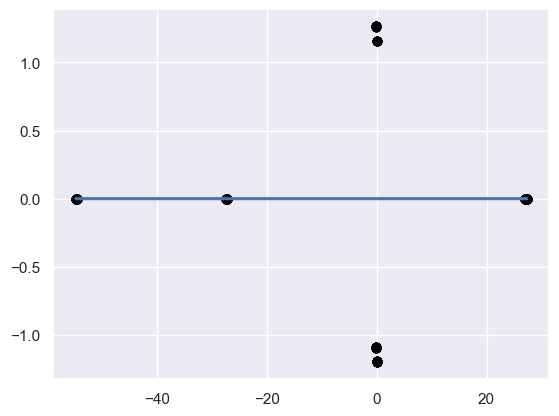

In [98]:
sns.regplot(x=logistic_model.fittedvalues, y=logistic_model.resid_dev, color="black", line_kws={"color":"b"}, lowess=True)

This assumption can be met, as the line is close to a y-intercept of 0 and is straight.

Next, we will be looking at two variables that can help us determine the strength of our model: the <b>Pseudo-R-Squared</b> and the <b>AUC</b>.

In [99]:
logistic_model.prsquared

0.7972825569346864

A Pseudo-R-Squred value of 0.8022 is quite high, which means that the data is quite parsimonious and fits our model well.

In [100]:
from sklearn.metrics import roc_auc_score
df_train['predicted_value'] = logistic_model.predict(df_train)
auc = roc_auc_score(y_true=df_train['Screen'], y_score=df_train['predicted_value'])
auc

0.9800321629589923

An AUC of 0.9806 is very good, as the best AUC we can achieve would be a value of 1, and an AUC of a model with random predictions would be 0.5. Since out AUC is so close to 1, we can say that our model is quite strong.

<h3>Creating a Classifier</h3>

To create a classifier with a predictive probability threshold of 0.5, we first have to train the dataset and then classify the data based on that threshold of 0.5. We will then find the accuracy of our classifier.

In [101]:
df_test['Screen'] = (df_test['screen_time'] > 5) * 1
df_test['usage_class'] = df_test['User Behavior Class']
classifier_test = logistic_model.predict(df_test)
df_test['predictive_prob'] = classifier_test
df_test['y_hat'] = 1*(df_test['predictive_prob']>=0.5)
df_test.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,battery_drain,no_apps,screen_time,data_usage,app_time,Screen,usage_class,predictive_prob,y_hat
223,224,Samsung Galaxy S21,Android,532,10.7,2556,83,2148,53,Female,5,2556,83,10.7,2148,532,1,5,1.000000e+00,1
335,336,OnePlus 9,Android,531,9.8,2905,99,1632,45,Female,5,2905,99,9.8,1632,531,1,5,1.000000e+00,1
115,116,iPhone 12,iOS,121,3.2,651,34,596,39,Male,2,651,34,3.2,596,121,0,2,1.500974e-12,0
466,467,Samsung Galaxy S21,Android,414,7.3,2349,75,1092,51,Male,4,2349,75,7.3,1092,414,1,4,1.000000e+00,1
47,48,Samsung Galaxy S21,Android,138,3.6,889,25,323,27,Female,2,889,25,3.6,323,138,0,2,1.174881e-12,0


In [102]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true=df_test['Screen'], y_pred=df_test['y_hat']).ravel()
(tn, fp, fn, tp)

(59, 10, 9, 62)

In [103]:
Accuracy = (tn+tp)/(tn+tp+fn+fp)
Accuracy

0.8642857142857143

This is a pretty high accuracy, as it means we are correct 88.57% of the time!

In [104]:
sensitivity = tp/(tp+fn)
sensitivity

0.8732394366197183

In [105]:
specificity = tn/(tn+fp)
specificity

0.855072463768116

This is the best possible specificity, as it means we have a 0% false-positive rate!

In this case, it is more important to minimize the false negative rate. It is dangerous for people to be using their phones for more than 5 hours a day, so phone companies should be sending notifications to users who might be using their phones too much reminding them to take a break. A false positive is not as bad in this case, as it will simply notify people who have been using their phones that they might be using it too much. This may be beneficial in some cases as it can get all people to use their phones less. However, a false negative would not be good, as adults who are using their phone for more than 5 hours a day would not be notified, and they may suffer eye damage. Thus, it is important to have a high sensitivity. Our sensitivity is already quite high at 78.37%, but we can increase this even more by decreasing our predictive probability threshold. 

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**


<b>N/A</b>

## 4. Conclusion


<h3>Summarization</h3>

<h3>Limitations</h3>

We mainly faced limitations in terms of the available data and finding the correct variables to use for our linear and regression models. We bleieve that we could have built a better model if the dataset had some more information. Specifically, we felt that, for the linear model, information about the user's commonly used apps, job type, and device age can have an impact on the battery drain, but we cannot confim this as the dataset does not contain thaat information. Similarly, we felt that these variables would also help us for the logistic model, as many people tend to prefer an Android or iOS operating system depending on their main goals from the device. Furthermore, we also did not have the time to fit many multiple models and find which variables had the best fit. We had to choose variables that we felt would be able to predict our response variable, and did not have much time to perform background research on these variables or check assumptions. However, we felt that we were still able to build good models and a relatively accurate classifier, but these limitations help provide us with more guidance if we choose to do more work with this model.

<h3>Future Work</h3>

If we were to conduct future work on this dataset, we would want to further refine our model by testing it on applicable new data. If new data were collected that is able to be used as test data, it would be interesting to see how well our model can predict both battery drain and type of operating system on new data. Furthermore, we would be interested in seeing what variables are needed to create the most parsimonious logistic model. Finding this model will help us determine which variables should truly be used in this model, as we had previously run into issues with multicollinearity. We would also want to test out many different predictive probability thresholds and find which one will truly help us maximize the values we are looking for. 0.5 is a good threshold to start with, but we can look at the relationship between the True Positive Rate and False Positive Rate and the ROC curve to find which predictive probability would be the best for us to choose.